In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('uni_data.csv')
df.head()

instnm  \
0  \tEducational Technical College-Recinto de Bay...   
1            A T Still University of Health Sciences   
2                             Aaniiih Nakoda College   
3                                   ABC Adult School   
4                   ABC Adult School - Cabrillo Lane   

                  Institution (entity) name (HD2018)  \
0  \tEducational Technical College-Recinto de Bay...   
1            A T Still University of Health Sciences   
2                             Aaniiih Nakoda College   
3                                   ABC Adult School   
4                   ABC Adult School - Cabrillo Lane   

  Street address or post office box (HD2018)  \
0                       CALLE SANTA CRUZ #28   
1                            800 W Jefferson   
2                269 Blackfeet Avenue Agency   
3                         12254 Cuesta Drive   
4                        20122 Cabrillo Lane   

  City location of institution (HD2018)  \
0                               BAYAMON   
1                            Kirksville   
2                                Harlem   
3                              Cerritos   
4                              Cerritos   

   Longitude location of institution (HD2018)  \
0                                  -66.151679   
1                                  -92.589183   
2                                 -108.757816   
3                                 -118.070114   
4                                 -118.078943   

   Latitude location of institution (HD2018)  \
0                                  18.398885   
1                                  40.193648   
2                                  48.484196   
3                                  33.878179   
4                                  33.847240   

   Percent of undergraduate students awarded federal  state  local  institutional or other sources of grant aid (SFA1718)  \
0                                               73.0                                                                        
1                                                NaN                                                                        
2                                               76.0                                                                        
3                                                0.0                                                                        
4                                                NaN                                                                        

   Average net price-students awarded grant or scholarship aid  2017-18 (SFA1718)  \
0                                            17736.0                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

   Applicants total (ADM2018)  Admissions total (ADM2018)  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   SAT Evidence-Based Reading and Writing 25th percentile score (ADM2018)  \
0                                                NaN                        
1                                                NaN                        
2                                                NaN                        
3                                                NaN                        
4                                                NaN                        

   SAT Evidence-Based Reading and Writing 75th percentile score (ADM2018)  \
0                                                NaN                   

We have to process the data and remove universities that do not provide necessary information. 

In [3]:
#Drop redundant and unnecessary columns
df.drop(columns=['instnm','Unnamed: 17'],axis=1,inplace=True)

#Give columns better names
df.columns=['Name','Address','City','Longitude','Latitude','Percent Receiving Financial Aid','Average Net Price','Total Applied','Total Admitted','SAT Reading/Writing 25th Percentile','SAT Reading/Writing 75th Percentile','SAT Math 25th Percentile','SAT Math 75th Percentile','ACT Composite 25th Percentile','ACT Composite 75th Percentile','Student-to-Faculty Ratio']

#Add an acceptance rate column
df['Acceptance Rate']=df['Total Admitted']/df['Total Applied']*100

#Drop rows that do not have important information
df=df.dropna(subset=['Longitude','Latitude','SAT Reading/Writing 75th Percentile','SAT Math 75th Percentile','ACT Composite 75th Percentile','Student-to-Faculty Ratio','Acceptance Rate'],axis=0).reset_index().drop('index',axis=1)

df.head()


Name            Address         City  \
0          Abilene Christian University                         Abilene   
1  Abraham Baldwin Agricultural College     2802 Moore Hwy       Tifton   
2                Adams State University  208 Edgemont Blvd      Alamosa   
3                    Adelphi University          South Ave  Garden City   
4                        Adrian College   110 S Madison St       Adrian   

    Longitude   Latitude  Percent Receiving Financial Aid  Average Net Price  \
0  -99.709797  32.468943                             97.0            27584.0   
1  -83.528281  31.481889                             68.0                NaN   
2 -105.879642  37.473636                             75.0                NaN   
3  -73.653321  40.721439                             87.0            28406.0   
4  -84.061481  41.898591                             96.0            26710.0   

   Total Applied  Total Admitted  SAT Reading/Writing 25th Percentile  \
0        11569.0          6590.0                                530.0   
1         2389.0          1647.0                                470.0   
2         1698.0          1675.0                                440.0   
3        13006.0          9648.0                                540.0   
4         5132.0          3326.0                                470.0   

   SAT Reading/Writing 75th Percentile  SAT Math 25th Percentile  \
0                                620.0                     510.0   
1                                580.0                     460.0   
2                                550.0                     430.0   
3                                630.0                     540.0   
4                                580.0                     470.0   

   SAT Math 75th Percentile  ACT Composite 25th Percentile  \
0                     610.0                           21.0   
1                     550.0                           17.0   
2                     530.0                           17.0   
3                     640.0                           22.0   
4                     576.0                           19.0   

   ACT Composite 75th Percentile  Student-to-Faculty Ratio  Acceptance Rate  
0                           27.0                      15.0        56.962572  
1                           22.0                      18.0        68.940979  
2                           22.0                      12.0        98.645465  
3                           27.0                      12.0        74.181147  
4                           26.0                      14.0        64.809041

In [4]:
import json
from geopy.geocoders import Nominatim
import requests
from pandas import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt

A map of only the universities that have provided academic data.

In [176]:
geolocator = Nominatim(user_agent="usa")
location = geolocator.geocode('United States of America')
latitude = location.latitude
longitude = location.longitude

map_usa = folium.Map(location=[latitude, longitude], zoom_start=4)

for lat, lng, name, city in zip(df['Latitude'], df['Longitude'],df['Name'],df['City']):
    label = '{}, {}'.format(name, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_usa)  

map_usa

### To find the optimal number of clusters, we will use the Elbow Method.

/Users/jignaparikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


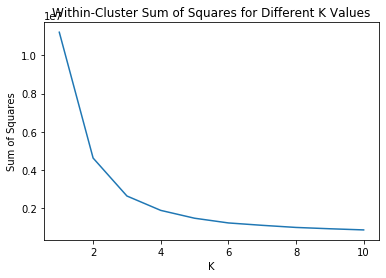

In [6]:
X=df[['SAT Reading/Writing 75th Percentile','SAT Math 75th Percentile','ACT Composite 75th Percentile','Student-to-Faculty Ratio','Acceptance Rate']]
X.dropna(inplace=True)

sse = []
for k in range(1,11):
    kmeans=KMeans(init='k-means++',n_clusters=k,n_init=12)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse)
plt.title('Within-Cluster Sum of Squares for Different K Values')
plt.xlabel('K')
plt.ylabel('Sum of Squares')
plt.show()

It seems that k=4 is the elbow point, as from there, the rate of decrease in the sum of squares drops significantly, so we will use 4 clusters based on academic profile.

In [7]:
kmeans=KMeans(init='k-means++',n_clusters=4,n_init=12).fit(X)
labels=kmeans.labels_
df['Academic Cluster']=labels
df.head()

Name            Address         City  \
0          Abilene Christian University                         Abilene   
1  Abraham Baldwin Agricultural College     2802 Moore Hwy       Tifton   
2                Adams State University  208 Edgemont Blvd      Alamosa   
3                    Adelphi University          South Ave  Garden City   
4                        Adrian College   110 S Madison St       Adrian   

    Longitude   Latitude  Percent Receiving Financial Aid  Average Net Price  \
0  -99.709797  32.468943                             97.0            27584.0   
1  -83.528281  31.481889                             68.0                NaN   
2 -105.879642  37.473636                             75.0                NaN   
3  -73.653321  40.721439                             87.0            28406.0   
4  -84.061481  41.898591                             96.0            26710.0   

   Total Applied  Total Admitted  SAT Reading/Writing 25th Percentile  \
0        11569.0          6590.0                                530.0   
1         2389.0          1647.0                                470.0   
2         1698.0          1675.0                                440.0   
3        13006.0          9648.0                                540.0   
4         5132.0          3326.0                                470.0   

   SAT Reading/Writing 75th Percentile  SAT Math 25th Percentile  \
0                                620.0                     510.0   
1                                580.0                     460.0   
2                                550.0                     430.0   
3                                630.0                     540.0   
4                                580.0                     470.0   

   SAT Math 75th Percentile  ACT Composite 25th Percentile  \
0                     610.0                           21.0   
1                     550.0                           17.0   
2                     530.0                           17.0   
3                     640.0                           22.0   
4                     576.0                           19.0   

   ACT Composite 75th Percentile  Student-to-Faculty Ratio  Acceptance Rate  \
0                           27.0                      15.0        56.962572   
1                           22.0                      18.0        68.940979   
2                           22.0                      12.0        98.645465   
3                           27.0                      12.0        74.181147   
4                           26.0                      14.0        64.809041   

   Academic Cluster  
0                 1  
1                 2  
2                 2  
3                 0  
4                 1

In [160]:
df.groupby('Academic Cluster').mean()

Longitude   Latitude  Percent Receiving Financial Aid  \
Academic Cluster                                                          
0                -88.992394  38.927764                        77.551971   
1                -88.843972  38.843807                        78.554622   
2                -88.205431  37.113691                        79.326087   
3                -87.244330  39.138682                        65.308271   

                  Average Net Price  Total Applied  Total Admitted  \
Academic Cluster                                                     
0                      28493.325301   10270.352313     6677.811388   
1                      23004.653061    5200.472689     3676.558824   
2                      20293.862245    3459.881988     2227.596273   
3                      29324.870000   24105.170370     6878.977778   

                  SAT Reading/Writing 25th Percentile  \
Academic Cluster                                        
0                                          556.886121   
1                                          501.500000   
2                                          452.962733   
3                                          646.022222   

                  SAT Reading/Writing 75th Percentile  \
Academic Cluster                                        
0                                          655.711744   
1                                          604.371849   
2                                          547.186335   
3                                          723.185185   

                  SAT Math 25th Percentile  SAT Math 75th Percentile  \
Academic Cluster                                                       
0                               543.807829                656.676157   
1                               494.199580                592.733193   
2                               445.906832                534.450311   
3                               658.748148                758.370370   

                  ACT Composite 25th Percentile  \
Academic Cluster                                  
0                                     22.761566   
1                                     19.598739   
2                                     17.024845   
3                                     29.074074   

                  ACT Composite 75th Percentile  Student-to-Faculty Ratio  \
Academic Cluster                                                            
0                                     28.473310                 14.003559   
1                                     25.348739                 14.214286   
2                                     22.142857                 14.090062   
3                                     33.000000                 10.940741   

                  Acceptance Rate  
Academic Cluster                   
0                       68.556511  
1                       72.386219  
2                       67.490585  
3                       31.968272

In [230]:
df.groupby('Academic Cluster').mean().iloc[:,6:]

SAT Reading/Writing 25th Percentile  \
Academic Cluster                                        
0                                          556.886121   
1                                          501.500000   
2                                          452.962733   
3                                          646.022222   

                  SAT Reading/Writing 75th Percentile  \
Academic Cluster                                        
0                                          655.711744   
1                                          604.371849   
2                                          547.186335   
3                                          723.185185   

                  SAT Math 25th Percentile  SAT Math 75th Percentile  \
Academic Cluster                                                       
0                               543.807829                656.676157   
1                               494.199580                592.733193   
2                               445.906832                534.450311   
3                               658.748148                758.370370   

                  ACT Composite 25th Percentile  \
Academic Cluster                                  
0                                     22.761566   
1                                     19.598739   
2                                     17.024845   
3                                     29.074074   

                  ACT Composite 75th Percentile  Student-to-Faculty Ratio  \
Academic Cluster                                                            
0                                     28.473310                 14.003559   
1                                     25.348739                 14.214286   
2                                     22.142857                 14.090062   
3                                     33.000000                 10.940741   

                  Acceptance Rate  
Academic Cluster                   
0                       68.556511  
1                       72.386219  
2                       67.490585  
3                       31.968272

Seemingly, Cluster 3 is most selective and has the highest test scores. Cluster 2 is less selective and has lowest test scores. Cluster 1 is least selective and has lower test scores. Cluster 0 is less selective and has middling test scores. 

In [9]:
df['Academic Profile']=''
for row in df.index:
    if df.loc[row,'Academic Cluster']==3:
        df.loc[row,'Academic Profile']='Most Selective/Highest Scores'
    if df.loc[row,'Academic Cluster']==2:
        df.loc[row,'Academic Profile']='Less Selective/Lowest Scores'
    if df.loc[row,'Academic Cluster']==0:
        df.loc[row,'Academic Profile']='Less Selective/Medium Scores'
    if df.loc[row,'Academic Cluster']==1:
        df.loc[row,'Academic Profile']='Least Selective/Lower Scores'

As expected, highly selective universities such as Harvard are in cluster 3.

In [10]:
df[df['Name']=='Harvard University']

Name             Address       City  Longitude   Latitude  \
360  Harvard University  Massachusetts Hall  Cambridge -71.118313  42.374471   

     Percent Receiving Financial Aid  Average Net Price  Total Applied  \
360                             43.0            17590.0        42749.0   

     Total Admitted  SAT Reading/Writing 25th Percentile  \
360          2024.0                                720.0   

     SAT Reading/Writing 75th Percentile  SAT Math 25th Percentile  \
360                                780.0                     740.0   

     SAT Math 75th Percentile  ACT Composite 25th Percentile  \
360                     800.0                           33.0   

     ACT Composite 75th Percentile  Student-to-Faculty Ratio  Acceptance Rate  \
360                           35.0                       7.0         4.734614   

     Academic Cluster               Academic Profile  
360                 3  Most Selective/Highest Scores

In [11]:
df.groupby('Academic Cluster').count()

Name  Address  City  Longitude  Latitude  \
Academic Cluster                                             
0                  281      281   281        281       281   
1                  476      476   476        476       476   
2                  322      322   322        322       322   
3                  135      135   135        135       135   

                  Percent Receiving Financial Aid  Average Net Price  \
Academic Cluster                                                       
0                                             279                166   
1                                             476                294   
2                                             322                196   
3                                             133                100   

                  Total Applied  Total Admitted  \
Academic Cluster                                  
0                           281             281   
1                           476             476   
2                           322             322   
3                           135             135   

                  SAT Reading/Writing 25th Percentile  \
Academic Cluster                                        
0                                                 281   
1                                                 476   
2                                                 322   
3                                                 135   

                  SAT Reading/Writing 75th Percentile  \
Academic Cluster                                        
0                                                 281   
1                                                 476   
2                                                 322   
3                                                 135   

                  SAT Math 25th Percentile  SAT Math 75th Percentile  \
Academic Cluster                                                       
0                                      281                       281   
1                                      476                       476   
2                                      322                       322   
3                                      135                       135   

                  ACT Composite 25th Percentile  \
Academic Cluster                                  
0                                           281   
1                                           476   
2                                           322   
3                                           135   

                  ACT Composite 75th Percentile  Student-to-Faculty Ratio  \
Academic Cluster                                                            
0                                           281                       281   
1                                           476                       476   
2                                           322                       322   
3                                           135                       135   

                  Acceptance Rate  Academic Profile  
Academic Cluster                                     
0                             281               281  
1                             476               476  
2                             322               322  
3                             135               135

In [49]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, name, cluster in zip(df['Latitude'], df['Longitude'], df['Name'], df['Academic Cluster']):
    label = folium.Popup(str(name) + ' ; Academic Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

__________________________________________________________________________________________________________________________

### Now that we have clustered the universities based on academic profile, we can use Foursquare to receive nearby venues.

As we need to provide a radius within which venues can be fetched, let's try 8000 meters (about 5 miles), and receive up to 50 venues for each university.


Before we find nearby venues for all the universities, let us first get venues for one university as an example, Stanford University.

In [13]:
CLIENT_ID = '0Z2ZCADZX4RPLJ2OWM3HNGAANL5ID45XHKTPXX5LHAOFCDHE' 
CLIENT_SECRET = 'EOSWLYS5RCMIC5O1WYDOBURMIROBCROMI2XGGHZCPN4Z4UPR' 
VERSION = '20180605'

Note: The above credentials will be invalid by the time this is submitted.

In [14]:
df[df['Name']=='Stanford University']

Name Address      City   Longitude   Latitude  \
835  Stanford University          Stanford -122.167359  37.429434   

     Percent Receiving Financial Aid  Average Net Price  Total Applied  \
835                             59.0            17271.0        47452.0   

     Total Admitted  SAT Reading/Writing 25th Percentile  \
835          2071.0                                700.0   

     SAT Reading/Writing 75th Percentile  SAT Math 25th Percentile  \
835                                770.0                     720.0   

     SAT Math 75th Percentile  ACT Composite 25th Percentile  \
835                     800.0                           32.0   

     ACT Composite 75th Percentile  Student-to-Faculty Ratio  Acceptance Rate  \
835                           35.0                       5.0          4.36441   

     Academic Cluster               Academic Profile  
835                 3  Most Selective/Highest Scores

From this, we can see that Stanford is index 835 in the dataframe. So we can get the latitude and longitude values to pass to Foursquare.

In [15]:
stanford_lat=df.loc[835,'Latitude']
stanford_long=df.loc[835,'Longitude']

<b>Now let's use Foursquare to get the top 50 venues within about 5 miles of Stanford.</b>

In [16]:
radius=8000
limit=50
url='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,stanford_lat,stanford_long,radius,limit)
url

'https://api.foursquare.com/v2/venues/explore?client_id=0Z2ZCADZX4RPLJ2OWM3HNGAANL5ID45XHKTPXX5LHAOFCDHE&client_secret=EOSWLYS5RCMIC5O1WYDOBURMIROBCROMI2XGGHZCPN4Z4UPR&v=20180605&ll=37.429434,-122.167359&radius=8000&limit=50'

In [24]:
results=requests.get(url).json()
venues=json_normalize(results['response']['groups'][0]['items'])
venues.head(2)

referralId  reasons.count  \
0  e-0-4ad0fcd1f964a520c1db20e3-0              0   
1  e-0-4fa6c29ee4b0ddd4972219dc-1              0   

                                       reasons.items  \
0  [{'summary': 'This spot is popular', 'type': '...   
1  [{'summary': 'This spot is popular', 'type': '...   

                   venue.id         venue.name venue.location.address  \
0  4ad0fcd1f964a520c1db20e3       Hoover Tower         434 Serra Mall   
1  4fa6c29ee4b0ddd4972219dc  Bing Concert Hall        327 Lasuen Mall   

   venue.location.lat  venue.location.lng  \
0           37.427937         -122.166895   
1           37.432163         -122.166529   

                       venue.location.labeledLatLngs  venue.location.distance  \
0  [{'label': 'display', 'lat': 37.42793721978111...                      171   
1  [{'label': 'display', 'lat': 37.43216286498232...                      312   

   ... venue.photos.groups venue.location.crossStreet venue.delivery.id  \
0  ...                  []                        NaN               NaN   
1  ...                  []               at Campus Dr               NaN   

  venue.delivery.url venue.delivery.provider.name  \
0                NaN                          NaN   
1                NaN                          NaN   

  venue.delivery.provider.icon.prefix venue.delivery.provider.icon.sizes  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   

   venue.delivery.provider.icon.name venue.venuePage.id  \
0                                NaN                NaN   
1                                NaN                NaN   

  venue.location.neighborhood  
0                         NaN  
1                         NaN  

[2 rows x 28 columns]

In [25]:
filtered_columns=['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues=venues.loc[:, filtered_columns]

The categories are in an unintelligible format so below is a function to extract the category of venues.

In [27]:
def get_category_type(row):
    try: categories_list = row['categories']
    except: categories_list = row['venue.categories']
        
    if len(categories_list) == 0: return None
    else: return categories_list[0]['name']

In [28]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

name           categories  \
0                                    Hoover Tower  Monument / Landmark   
1                               Bing Concert Hall         Concert Hall   
2  Iris & B. Gerald Cantor Center for Visual Arts           Art Museum   
3                          Rodin Sculpture Garden     Sculpture Garden   
4                             Anderson Collection           Art Museum   

         lat         lng  
0  37.427937 -122.166895  
1  37.432163 -122.166529  
2  37.432981 -122.170624  
3  37.432362 -122.170670  
4  37.433900 -122.170638

Now that we know how to get the nearby venues, let us repeat the process for all the universities. This function returns a dataframe with the nearby venues of each university.

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=8000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            50)
        
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']   
        except:
            continue
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['University', 
                  'University Latitude', 
                  'University Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
uni_venues = getNearbyVenues(names=df['Name'],latitudes=df['Latitude'],longitudes=df['Longitude'])
uni_venues.head()

University  University Latitude  University Longitude  \
0  Abilene Christian University            32.468943            -99.709797   
1  Abilene Christian University            32.468943            -99.709797   
2  Abilene Christian University            32.468943            -99.709797   
3  Abilene Christian University            32.468943            -99.709797   
4  Abilene Christian University            32.468943            -99.709797   

                  Venue  Venue Latitude  Venue Longitude        Venue Category  
0           Chick-fil-A       32.469188       -99.708454          Food Service  
1  Nikki's Swirl Shoppe       32.461876       -99.705671          Dessert Shop  
2           Chick-fil-A       32.480015       -99.695307  Fast Food Restaurant  
3   United Supermarkets       32.461894       -99.705149         Grocery Store  
4   Chili's Grill & Bar       32.479519       -99.696521    Tex-Mex Restaurant

In [36]:
uni_venues.groupby('University').count()

University Latitude  \
University                                                  
Abilene Christian University                           50   
Abraham Baldwin Agricultural College                   50   
Adams State University                                 50   
Adelphi University                                     50   
Adrian College                                         50   
...                                                   ...   
Yeshiva University                                     50   
York College                                           43   
York College of Pennsylvania                           50   
Young Harris College                                   31   
Youngstown State University                            50   

                                      University Longitude  Venue  \
University                                                          
Abilene Christian University                            50     50   
Abraham Baldwin Agricultural College                    50     50   
Adams State University                                  50     50   
Adelphi University                                      50     50   
Adrian College                                          50     50   
...                                                    ...    ...   
Yeshiva University                                      50     50   
York College                                            43     43   
York College of Pennsylvania                            50     50   
Young Harris College                                    31     31   
Youngstown State University                             50     50   

                                      Venue Latitude  Venue Longitude  \
University                                                              
Abilene Christian University                      50               50   
Abraham Baldwin Agricultural College              50               50   
Adams State University                            50               50   
Adelphi University                                50               50   
Adrian College                                    50               50   
...                                              ...              ...   
Yeshiva University                                50               50   
York College                                      43               43   
York College of Pennsylvania                      50               50   
Young Harris College                              31               31   
Youngstown State University                       50               50   

                                      Venue Category  
University                                            
Abilene Christian University                      50  
Abraham Baldwin Agricultural College              50  
Adams State University                            50  
Adelphi University                                50  
Adrian College                                    50  
...                                              ...  
Yeshiva University                                50  
York College                                      43  
York College of Pennsylvania                      50  
Young Harris College                              31  
Youngstown State University                       50  

[1162 rows x 6 columns]

In [37]:
print('There are {} unique categories.'.format(len(uni_venues['Venue Category'].unique())))

There are 522 unique categories.


In [39]:
uni_onehot = pd.get_dummies(uni_venues[['Venue Category']], prefix="", prefix_sep="")

# add name column back to dataframe
uni_onehot['University'] = uni_venues['University'] 

uni_onehot.head()

ATM  Accessories Store  Adult Boutique  Afghan Restaurant  \
0    0                  0               0                  0   
1    0                  0               0                  0   
2    0                  0               0                  0   
3    0                  0               0                  0   
4    0                  0               0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   American Restaurant  Amphitheater  ...  Well  Whisky Bar  Wine Bar  \
0                    0             0  ...     0           0         0   
1                    0             0  ...     0           0         0   
2                    0             0  ...     0           0         0   
3                    0             0  ...     0           0         0   
4                    0             0  ...     0           0         0   

   Wine Shop  Winery  Wings Joint  Women's Store  Yoga Studio  Zoo  \
0          0       0            0              0            0    0   
1          0       0            0              0            0    0   
2          0       0            0              0            0    0   
3          0       0            0              0            0    0   
4          0       0            0              0            0    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 522 columns]

In [40]:
uni_onehot.shape

(54198, 522)

Below, we group by university and take the mean of frequency for each venue category.

In [224]:
unis_grouped.iloc[340:350,[0,18,29,40,69,77,94,281,326,390,452]]

University  Art Museum  BBQ Joint  Beach  \
340          Hardin-Simmons University        0.00       0.00    0.0   
341                 Harding University        0.00       0.04    0.0   
342                   Hartwick College        0.00       0.02    0.0   
343                 Harvard University        0.02       0.00    0.0   
344                Harvey Mudd College        0.00       0.00    0.0   
345  Haskell Indian Nations University        0.00       0.00    0.0   
346                   Hastings College        0.00       0.00    0.0   
347                  Haverford College        0.00       0.00    0.0   
348          Hawaii Pacific University        0.02       0.00    0.0   
349              Heidelberg University        0.00       0.00    0.0   

     Burger Joint      Café  Chinese Restaurant  Laundry Service  Nail Salon  \
340          0.04  0.000000                0.04              0.0         0.0   
341          0.00  0.020000                0.00              0.0         0.0   
342          0.02  0.060000                0.00              0.0         0.0   
343          0.00  0.060000                0.00              0.0         0.0   
344          0.00  0.020000                0.00              0.0         0.0   
345          0.06  0.000000                0.00              0.0         0.0   
346          0.02  0.020000                0.02              0.0         0.0   
347          0.00  0.020000                0.00              0.0         0.0   
348          0.00  0.020000                0.04              0.0         0.0   
349          0.00  0.020833                0.00              0.0         0.0   

     Record Shop  Stationery Store  
340         0.00              0.00  
341         0.00              0.00  
342         0.00              0.00  
343         0.00              0.00  
344         0.02              0.00  
345         0.02              0.00  
346         0.00              0.00  
347         0.00              0.00  
348         0.00              0.02  
349         0.00              0.00

In [41]:
unis_grouped = uni_onehot.groupby('University').mean().reset_index()
unis_grouped

University  ATM  Accessories Store  \
0             Abilene Christian University  0.0                0.0   
1     Abraham Baldwin Agricultural College  0.0                0.0   
2                   Adams State University  0.0                0.0   
3                       Adelphi University  0.0                0.0   
4                           Adrian College  0.0                0.0   
...                                    ...  ...                ...   
1157                    Yeshiva University  0.0                0.0   
1158                          York College  0.0                0.0   
1159          York College of Pennsylvania  0.0                0.0   
1160                  Young Harris College  0.0                0.0   
1161           Youngstown State University  0.0                0.0   

      Adult Boutique  Afghan Restaurant  African Restaurant   Airport  \
0                0.0                0.0                 0.0  0.000000   
1                0.0                0.0                 0.0  0.000000   
2                0.0                0.0                 0.0  0.020000   
3                0.0                0.0                 0.0  0.000000   
4                0.0                0.0                 0.0  0.000000   
...              ...                ...                 ...       ...   
1157             0.0                0.0                 0.0  0.000000   
1158             0.0                0.0                 0.0  0.023256   
1159             0.0                0.0                 0.0  0.000000   
1160             0.0                0.0                 0.0  0.000000   
1161             0.0                0.0                 0.0  0.000000   

      Airport Lounge  Airport Service  American Restaurant  ...  Well  \
0                0.0              0.0             0.080000  ...   0.0   
1                0.0              0.0             0.060000  ...   0.0   
2                0.0              0.0             0.000000  ...   0.0   
3                0.0              0.0             0.000000  ...   0.0   
4                0.0              0.0             0.060000  ...   0.0   
...              ...              ...                  ...  ...   ...   
1157             0.0              0.0             0.000000  ...   0.0   
1158             0.0              0.0             0.093023  ...   0.0   
1159             0.0              0.0             0.020000  ...   0.0   
1160             0.0              0.0             0.129032  ...   0.0   
1161             0.0              0.0             0.040000  ...   0.0   

      Whisky Bar  Wine Bar  Wine Shop  Winery  Wings Joint  Women's Store  \
0            0.0      0.02       0.00     0.0         0.02       0.000000   
1            0.0      0.00       0.00     0.0         0.02       0.000000   
2            0.0      0.00       0.00     0.0         0.00       0.000000   
3            0.0      0.02       0.00     0.0         0.00       0.000000   
4            0.0      0.00       0.00     0.0         0.00       0.020000   
...          ...       ...        ...     ...          ...            ...   
1157         0.0      0.02       0.02     0.0         0.00       0.000000   
1158         0.0      0.00       0.00     0.0         0.00       0.023256   
1159         0.0      0.00       0.00     0.0         0.02       0.000000   
1160         0.0      0.00       0.00     0.0         0.00       0.000000   
1161         0.0      0.02       0.00     0.0         0.00       0.000000   

      Yoga Studio   Zoo  Zoo Exhibit  
0             0.0  0.02          0.0  
1             0.0  0.00          0.0  
2             0.0  0.00          0.0  
3             0.0  0.00          0.0  
4             0.0  0.00          0.0  
...           ...   ...          ...  
1157          0.0  0.00          0.0  
1158          0.0  0.00          0.0  
1159          0.0  0.00          0.0  
1160          0.0  0.00          0.0  
1161          0.0  0.00          0.0  

[1162 rows x 522 columns]

We need to know the most common types of venues for each university. 
We will use the below function to receive the 15 most common types of venues surrounding each university in a 5-mile radius.

In [43]:
def getmostcommonvenues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
dfcolumns = ['University']
for index in range(15):
    try:
        dfcolumns.append('{}{} Most Common Venue'.format(index+1, indicators[index]))
    except:
        dfcolumns.append('{}th Most Common Venue'.format(index+1))

# create a new dataframe
unis_sorted = pd.DataFrame(columns=dfcolumns)
unis_sorted['University'] = unis_grouped['University']

for index in range(unis_grouped.shape[0]):
    unis_sorted.iloc[index, 1:] = getmostcommonvenues(unis_grouped.iloc[index, :], 15)

unis_sorted.head()

University 1st Most Common Venue  \
0          Abilene Christian University           Coffee Shop   
1  Abraham Baldwin Agricultural College        Sandwich Place   
2                Adams State University  Fast Food Restaurant   
3                    Adelphi University             BBQ Joint   
4                        Adrian College    Mexican Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0    Mexican Restaurant                 Hotel   American Restaurant   
1   American Restaurant  Fast Food Restaurant    Mexican Restaurant   
2    Mexican Restaurant           Pizza Place           Coffee Shop   
3           Pizza Place         Deli / Bodega            Boxing Gym   
4        Ice Cream Shop        Sandwich Place   American Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Deli / Bodega         Grocery Store  Fast Food Restaurant   
1                  Café        Discount Store                Bakery   
2                 Hotel      Department Store                  Café   
3                Bakery           Event Space      Sushi Restaurant   
4           Coffee Shop                   Gym             Multiplex   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0          Burger Joint        Ice Cream Shop          Movie Theater   
1         Grocery Store           Coffee Shop     Italian Restaurant   
2     Mobile Phone Shop         Grocery Store         Sandwich Place   
3        Breakfast Spot  Gym / Fitness Center         Ice Cream Shop   
4  Fast Food Restaurant      Department Store            Pizza Place   

  11th Most Common Venue      12th Most Common Venue 13th Most Common Venue  \
0   Gym / Fitness Center                   Rock Club              BBQ Joint   
1     Tex-Mex Restaurant                       Hotel     Seafood Restaurant   
2         Discount Store  Construction & Landscaping     Italian Restaurant   
3             Bagel Shop                         Bar       Basketball Court   
4     Seafood Restaurant                         Bar                   Park   

  14th Most Common Venue 15th Most Common Venue  
0             Donut Shop         Sandwich Place  
1               Pharmacy        Thai Restaurant  
2               Pharmacy     Chinese Restaurant  
3                    Gym          Grocery Store  
4          Grocery Store                Theater

Now we will cluster the universities based on venues. We will again use the elbow method to determine the optimal number of clusters.

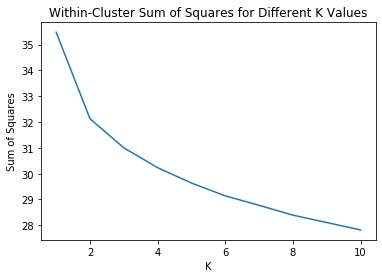

In [54]:
X1=unis_grouped.drop('University',axis=1)
X1.dropna(inplace=True)

sse1 = []
for k in range(1,11):
    kmeans=KMeans(init='k-means++',n_clusters=k,n_init=12)
    kmeans.fit(X1)
    sse1.append(kmeans.inertia_)

plt.plot(range(1,11),sse1)
plt.title('Within-Cluster Sum of Squares for Different K Values')
plt.xlabel('K')
plt.ylabel('Sum of Squares')
plt.show()

Let us try k=5. It seems that the rate of decrease declines from there.

In [93]:
kmeans1=KMeans(init='k-means++',n_clusters=5,n_init=12).fit(X1)
labels1=kmeans1.labels_

# add clustering labels
unis_sorted.insert(0, 'Venue Cluster', labels1)

unis_merged = df.rename(columns={'Name':'University'})

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
unis_merged = unis_merged.join(unis_sorted.set_index('University'), on='University')

unis_merged.head()

University            Address         City  \
0          Abilene Christian University                         Abilene   
1  Abraham Baldwin Agricultural College     2802 Moore Hwy       Tifton   
2                Adams State University  208 Edgemont Blvd      Alamosa   
3                    Adelphi University          South Ave  Garden City   
4                        Adrian College   110 S Madison St       Adrian   

    Longitude   Latitude  Percent Receiving Financial Aid  Average Net Price  \
0  -99.709797  32.468943                             97.0            27584.0   
1  -83.528281  31.481889                             68.0                NaN   
2 -105.879642  37.473636                             75.0                NaN   
3  -73.653321  40.721439                             87.0            28406.0   
4  -84.061481  41.898591                             96.0            26710.0   

   Total Applied  Total Admitted  SAT Reading/Writing 25th Percentile  ...  \
0        11569.0          6590.0                                530.0  ...   
1         2389.0          1647.0                                470.0  ...   
2         1698.0          1675.0                                440.0  ...   
3        13006.0          9648.0                                540.0  ...   
4         5132.0          3326.0                                470.0  ...   

   6th Most Common Venue  7th Most Common Venue  8th Most Common Venue  \
0          Grocery Store   Fast Food Restaurant           Burger Joint   
1         Discount Store                 Bakery          Grocery Store   
2       Department Store                   Café      Mobile Phone Shop   
3            Event Space       Sushi Restaurant         Breakfast Spot   
4                    Gym              Multiplex   Fast Food Restaurant   

   9th Most Common Venue  10th Most Common Venue  11th Most Common Venue  \
0         Ice Cream Shop           Movie Theater    Gym / Fitness Center   
1            Coffee Shop      Italian Restaurant      Tex-Mex Restaurant   
2          Grocery Store          Sandwich Place          Discount Store   
3   Gym / Fitness Center          Ice Cream Shop              Bagel Shop   
4       Department Store             Pizza Place      Seafood Restaurant   

       12th Most Common Venue  13th Most Common Venue 14th Most Common Venue  \
0                   Rock Club               BBQ Joint             Donut Shop   
1                       Hotel      Seafood Restaurant               Pharmacy   
2  Construction & Landscaping      Italian Restaurant               Pharmacy   
3                         Bar        Basketball Court                    Gym   
4                         Bar                    Park          Grocery Store   

   15th Most Common Venue  
0          Sandwich Place  
1         Thai Restaurant  
2      Chinese Restaurant  
3           Grocery Store  
4                 Theater  

[5 rows x 35 columns]

## Now let's examine the venue clusters to find similarities among them.

<b>Venue Cluster 0</b>

In [94]:
unis_sorted[unis_sorted['Venue Cluster']==0].tail(10).iloc[:,1:]

University 1st Most Common Venue  \
1104                         Webster University         Grocery Store   
1105                          Wellesley College         Grocery Store   
1106          Wentworth Institute of Technology                 Trail   
1109    West Chester University of Pennsylvania    Italian Restaurant   
1120             Western New England University    Italian Restaurant   
1132                         Widener University         Grocery Store   
1138  William Paterson University of New Jersey    Italian Restaurant   
1155             Xavier University of Louisiana                  Café   
1157                         Yeshiva University                  Park   
1160                       Young Harris College   American Restaurant   

         2nd Most Common Venue            3rd Most Common Venue  \
1104        Mexican Restaurant              American Restaurant   
1105  Mediterranean Restaurant                            Plaza   
1106         French Restaurant                      Salad Place   
1109            Breakfast Spot                Convenience Store   
1120                    Bakery                             Park   
1132                    Bakery                   Ice Cream Shop   
1138        Spanish Restaurant                   Ice Cream Shop   
1155       American Restaurant  Southern / Soul Food Restaurant   
1157                      Café               Italian Restaurant   
1160                     Trail                   Scenic Lookout   

          4th Most Common Venue 5th Most Common Venue  \
1104                Coffee Shop      Greek Restaurant   
1105                Coffee Shop   American Restaurant   
1106                     Bakery    Italian Restaurant   
1109              Grocery Store               Brewery   
1120        American Restaurant         Grocery Store   
1132                      Diner  Fast Food Restaurant   
1138                       Park           Pizza Place   
1155  Cajun / Creole Restaurant    Italian Restaurant   
1157                      Trail    Mexican Restaurant   
1160                     Resort    Italian Restaurant   

          6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
1104                     Bakery            Donut Shop                Brewery   
1105         Italian Restaurant                  Park         Farmers Market   
1106         Mexican Restaurant                   Gym       Greek Restaurant   
1109                Coffee Shop        Sandwich Place                   Park   
1120        Japanese Restaurant          Burger Joint            Pizza Place   
1132          Convenience Store        Farmers Market                Brewery   
1138  Latin American Restaurant        Breakfast Spot                    Bar   
1155                        Bar                   Pub  Performing Arts Venue   
1157                Pizza Place      Baseball Stadium      Korean Restaurant   
1160                     Arcade    Mexican Restaurant         Discount Store   

     9th Most Common Venue 10th Most Common Venue    11th Most Common Venue  \
1104           Pizza Place          Deli / Bodega                      Park   
1105            Donut Shop     Chinese Restaurant                     Trail   
1106          Liquor Store              Gastropub              Gourmet Shop   
1109                Bakery       Asian Restaurant                     Diner   
1120        Sandwich Place         Lingerie Store                 BBQ Joint   
1132   Fried Chicken Joint         Sandwich Place                   Theater   
1138         Grocery Store          Hot Dog Joint                 Bookstore   
1155         Grocery Store                 Lounge  Mediterranean Restaurant   
1157        History Museum                 Museum                Restaurant   
1160                Bakery        Harbor / Marina          Asian Restaurant   

         12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
1104             Ice Cream Shop    

Universities in Venue Cluster 0 seem to have many casual venues, like coffee and bars.

<b>Venue Cluster 1</b>

In [95]:
unis_sorted[unis_sorted['Venue Cluster']==1].tail(10).iloc[:,1:]

University 1st Most Common Venue  \
1127      Wheeling Jesuit University                  Café   
1139        William Peace University           Coffee Shop   
1142                Williams College   American Restaurant   
1146         Winona State University           Coffee Shop   
1147  Winston-Salem State University               Brewery   
1149      Wisconsin Lutheran College           Coffee Shop   
1154               Xavier University           Zoo Exhibit   
1156                 Yale University           Pizza Place   
1159    York College of Pennsylvania           Pizza Place   
1161     Youngstown State University           Pizza Place   

     2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1127   American Restaurant    Italian Restaurant           Pizza Place   
1139               Brewery                Bakery          Burger Joint   
1142            Art Museum           Pizza Place        Sandwich Place   
1146     Convenience Store           Pizza Place        Sandwich Place   
1147                   Bar         Grocery Store   American Restaurant   
1149           Zoo Exhibit    Italian Restaurant                   Bar   
1154        Ice Cream Shop           Pizza Place   American Restaurant   
1156     Indian Restaurant        Sandwich Place      Sushi Restaurant   
1159                   Bar  Fast Food Restaurant           Coffee Shop   
1161    Italian Restaurant           Coffee Shop                   Bar   

         5th Most Common Venue    6th Most Common Venue  \
1127                   Brewery       Mexican Restaurant   
1139              Cocktail Bar           Science Museum   
1142                Sports Bar  New American Restaurant   
1146                       Bar           Ice Cream Shop   
1147  Mediterranean Restaurant              Coffee Shop   
1149                      Café              Beer Garden   
1154               Coffee Shop                  Brewery   
1156       American Restaurant                      Bar   
1159                 BBQ Joint                   Bakery   
1161       American Restaurant           Ice Cream Shop   

                7th Most Common Venue 8th Most Common Venue  \
1127                      Coffee Shop           Golf Course   
1139  Southern / Soul Food Restaurant      Sushi Restaurant   
1142                            Hotel           Coffee Shop   
1146                             Café               Brewery   
1147                             Park                Bakery   
1149                   Ice Cream Shop                  Park   
1154               Chinese Restaurant                Bakery   
1156                          Theater          Burger Joint   
1159                              Gym               Brewery   
1161        Middle Eastern Restaurant                  Park   

     9th Most Common Venue 10th Most Common Venue  \
1127                   Bar         Ice Cream Shop   
1139   American Restaurant             Beer Store   
1142         Grocery Store      College Bookstore   
1146         Grocery Store          Movie Theater   
1147             BBQ Joint            Pizza Place   
1149            Steakhouse                    Gym   
1154          Burger Joint          Hot Dog Joint   
1156            Restaurant                   Park   
1159         Shopping Mall         Hardware Store   
1161         Hot Dog Joint           Cocktail Bar   

               11th Most Common Venue     12th Most Common Venue  \
1127                   Sandwich Place                      Hotel   
1139         Mediterranean Restaurant                       Park   
1142                             Bank         Chinese Restaurant   
1146                    Women's Store         Chinese Restaurant   
1147  Southern / Soul Food Restaurant                   Beer Bar   
1149                    Grocery Store               Liquor Store   
1154          New American Restaurant                  Bookstore   
1156                           Bakery  Middle Eastern Re

Universities in Venue Cluster 1 seem to have many outdoor venues.

<b>Venue Cluster 2</b>

In [96]:
unis_sorted[unis_sorted['Venue Cluster']==2].tail(10).iloc[:,1:]

University 1st Most Common Venue  \
1063    University of the Cumberlands  Fast Food Restaurant   
1068                Urbana University  Fast Food Restaurant   
1099       Wayland Baptist University  Fast Food Restaurant   
1101            Waynesburg University  Fast Food Restaurant   
1103  Webber International University           Gas Station   
1110          West Liberty University           Golf Course   
1115   West Virginia Wesleyan College  Fast Food Restaurant   
1141      Williams Baptist University  Fast Food Restaurant   
1145               Wingate University  Fast Food Restaurant   
1158                     York College  Fast Food Restaurant   

     2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1063           Gas Station    Mexican Restaurant                 Hotel   
1068           Pizza Place           Gas Station        Ice Cream Shop   
1099    Mexican Restaurant           Gas Station           Supermarket   
1101           Gas Station           Pizza Place        Discount Store   
1103  Fast Food Restaurant        Discount Store            Campground   
1110           Post Office        Sandwich Place            Restaurant   
1115           Pizza Place   American Restaurant        Sandwich Place   
1141        Discount Store         Train Station     Convenience Store   
1145              Pharmacy           Gas Station        Discount Store   
1158           Pizza Place                 Hotel   American Restaurant   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1063              Mountain           Pizza Place              Pharmacy   
1068         Big Box Store           Coffee Shop    Mexican Restaurant   
1099   American Restaurant           Pizza Place          Liquor Store   
1101              Pharmacy                 Hotel        Sandwich Place   
1103              Pharmacy            Sports Bar            Donut Shop   
1110                  Café           Pizza Place  Fast Food Restaurant   
1115           Gas Station              Pharmacy        Discount Store   
1141         Grocery Store               Airport   Fried Chicken Joint   
1145        Ice Cream Shop           Video Store    Mexican Restaurant   
1158           Gas Station    Mexican Restaurant        Ice Cream Shop   

     8th Most Common Venue 9th Most Common Venue      10th Most Common Venue  \
1063        Sandwich Place        Breakfast Spot         Fried Chicken Joint   
1068        Discount Store                 Diner              Tennis Stadium   
1099        Sandwich Place  Gym / Fitness Center              Breakfast Spot   
1101         Big Box Store          Liquor Store               Grocery Store   
1103        Sandwich Place             BBQ Joint                         Bar   
1110               Airport               Exhibit                  Eye Doctor   
1115           Post Office    Mexican Restaurant                       Hotel   
1141           Coffee Shop           Pizza Place               Big Box Store   
1145           Supermarket             BBQ Joint  Construction & Landscaping   
1158        Sandwich Place             Rest Area                    Pharmacy   

     11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
1063         Discount Store             Water Park          Big Box Store   
1068     Chinese Restaurant   Gym / Fitness Center         Sandwich Place   
1099         Clothing Store         Discount Store              Gift Shop   
1101     Mexican Restaurant         Ice Cream Shop            Supermarket   
1103   Gym / Fitness Center             Steakhouse          Grocery Store   
1110            Event Space          Event Service            Fabric Shop   
1115            Supermarket           Dessert Shop                   Bank   
1141     Falafel Restaurant         Farmers Market                   Farm   
1145          Historic Site        Paintball Field         Sandwich Place   
1158          Bowling Alley            Golf Course  

Universities in Venue Cluster 2 seem to have many fast food joints.

<b>Venue Cluster 3</b>

In [97]:
unis_sorted[unis_sorted['Venue Cluster']==3].tail(10).iloc[:,1:]

University 1st Most Common Venue  \
1130                 Whitworth University           Coffee Shop   
1131             Wichita State University    Mexican Restaurant   
1135             William Carey University    Mexican Restaurant   
1136            William Jessup University           Coffee Shop   
1137               William Jewell College           Coffee Shop   
1144                       Wilson College        Ice Cream Shop   
1148                  Winthrop University   American Restaurant   
1150                      Wofford College   American Restaurant   
1151                  Woodbury University    Mexican Restaurant   
1153  Wright State University-Main Campus           Pizza Place   

     2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1130      Sushi Restaurant    Italian Restaurant             Gastropub   
1131           Pizza Place               Brewery     Convenience Store   
1135           Coffee Shop   American Restaurant                   Bar   
1136           Pizza Place    Chinese Restaurant    Mexican Restaurant   
1137           Pizza Place  Fast Food Restaurant        Sandwich Place   
1144   American Restaurant    Mexican Restaurant           Coffee Shop   
1148         Grocery Store        Sandwich Place    Mexican Restaurant   
1150           Coffee Shop         Grocery Store  Gym / Fitness Center   
1151        Sandwich Place           Coffee Shop  Gym / Fitness Center   
1153        Sandwich Place    Mexican Restaurant           Coffee Shop   

          5th Most Common Venue 6th Most Common Venue  \
1130                Pizza Place   American Restaurant   
1131                     Bakery             Gastropub   
1135  Cajun / Creole Restaurant                   Pub   
1136                        Gym         Grocery Store   
1137         Mexican Restaurant        Ice Cream Shop   
1144         Italian Restaurant  Fast Food Restaurant   
1148          Convenience Store           Coffee Shop   
1150                Pizza Place         Deli / Bodega   
1151       Fast Food Restaurant          Burger Joint   
1153               Burger Joint                 Hotel   

         7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1130            Hardware Store    Mexican Restaurant           Supermarket   
1131  Mediterranean Restaurant         Grocery Store             Bookstore   
1135              Burger Joint            Steakhouse           Music Venue   
1136      Fast Food Restaurant          Concert Hall         Bowling Alley   
1137                    Bakery  Gym / Fitness Center        Breakfast Spot   
1144            Hardware Store      Department Store      Asian Restaurant   
1148                      Park      Greek Restaurant  Gym / Fitness Center   
1150                       Pub                 Trail        Breakfast Spot   
1151                     Trail            Donut Shop                  Park   
1153            Breakfast Spot            Steakhouse             Bookstore   

        10th Most Common Venue    11th Most Common Venue  \
1130              Burger Joint             Grocery Store   
1131               Coffee Shop            Sandwich Place   
1135  College Baseball Diamond       Fried Chicken Joint   
1136          Basketball Court              Liquor Store   
1137             Grocery Store                Steakhouse   
1144                   Brewery                Steakhouse   
1148               Pizza Place      Fast Food Restaurant   
1150                   Brewery         Convenience Store   
1151                       Bar  Mediterranean Restaurant   
1153                    Museum                Smoke Shop   

     12th Most Common Venue     13th Most Common Venue  \
1130                  Diner                     Bakery   
1131             Restaurant  Latin American Restaurant   
1135              BBQ Joint                 Bagel Shop   
1136     Tex-Mex Restaurant              Big Box Store   
1137          Jewelry Store             

Universities in Venue Cluster 3 seem to have a variety of international cuisines.

<b>Venue Cluster 4</b>

In [98]:
unis_sorted[unis_sorted['Venue Cluster']==4].tail(10).iloc[:,1:]

University 1st Most Common Venue  \
1097        Washington and Lee University   American Restaurant   
1111          West Texas A & M University  Fast Food Restaurant   
1117          Western Illinois University           Pizza Place   
1123           Westfield State University           Pizza Place   
1124                  Westminster College           Pizza Place   
1133               Wilberforce University           Pizza Place   
1134                    Wilkes University           Pizza Place   
1140             William Woods University           Pizza Place   
1143                   Wilmington College           Pizza Place   
1152  Wright State University-Lake Campus                   Bar   

     2nd Most Common Venue 3rd Most Common Venue       4th Most Common Venue  \
1097           Gas Station        Ice Cream Shop                  Restaurant   
1111           Pizza Place           Gas Station              Sandwich Place   
1117        Sandwich Place  Fast Food Restaurant         American Restaurant   
1123            Donut Shop   American Restaurant               Grocery Store   
1124        Discount Store           Coffee Shop        Fast Food Restaurant   
1133                  Bank   American Restaurant                 Gas Station   
1134        Ice Cream Shop   American Restaurant          Mexican Restaurant   
1140  Fast Food Restaurant        Discount Store              Sandwich Place   
1143        Discount Store           Gas Station  Construction & Landscaping   
1152           Pizza Place  Fast Food Restaurant              Discount Store   

     5th Most Common Venue 6th Most Common Venue  7th Most Common Venue  \
1097                 Hotel        Breakfast Spot            Supermarket   
1111             BBQ Joint        Ice Cream Shop    Fried Chicken Joint   
1117              Pharmacy                   Bar          Grocery Store   
1123              Pharmacy                  Park            Coffee Shop   
1124   American Restaurant         Grocery Store            Gas Station   
1133    Mexican Restaurant           Coffee Shop         Sandwich Place   
1134           Gas Station                   Bar       Department Store   
1140    Chinese Restaurant     Convenience Store  General Entertainment   
1143        Sandwich Place  Fast Food Restaurant     Mexican Restaurant   
1152           Gas Station   American Restaurant         Sandwich Place   

     8th Most Common Venue    9th Most Common Venue 10th Most Common Venue  \
1097        Discount Store              Coffee Shop           Outlet Store   
1111  Gym / Fitness Center            Big Box Store               Tea Room   
1117    Italian Restaurant           Discount Store                  Hotel   
1123    Italian Restaurant               Restaurant             Sports Bar   
1124        Sandwich Place       Chinese Restaurant               Tea Room   
1133                   ATM                Drugstore         Discount Store   
1134         Deli / Bodega           Sandwich Place            Wings Joint   
1140         Bowling Alley                Gastropub                  Diner   
1143               Stadium  New American Restaurant    Rental Car Location   
1152    Mexican Restaurant              Coffee Shop         Hardware Store   

     11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
1097                  Diner              BBQ Joint         Sandwich Place   
1111     Mexican Restaurant             Taco Place            Supermarket   
1117     Mexican Restaurant                   Café            Bus Station   
1123      Convenience Store         Breakfast Spot         Sandwich Place   
1124                   Park                  Diner           Burger Joint   
1133     Salon / Barbershop                  Diner         Hardware Store   
1134          Hot Dog Joint            Salad Place            Supermarket   
1140          Big Box Store          Grocery Store                    Bar   
1143         Hardware Store       

Universities in Venue Cluster 4 seem to have a lot of pizza and dessert places.

### Let's also examine the mode for the top 8 venue categories for each venue cluster.

In [271]:
clus0=list(np.concatenate(unis_sorted[unis_sorted['Venue Cluster']==0].iloc[:,2:-8].values))

In [272]:
clus1=list(np.concatenate(unis_sorted[unis_sorted['Venue Cluster']==1].iloc[:,2:-8].values))

In [273]:
clus2=list(np.concatenate(unis_sorted[unis_sorted['Venue Cluster']==2].iloc[:,2:-8].values))

In [274]:
clus3=list(np.concatenate(unis_sorted[unis_sorted['Venue Cluster']==3].iloc[:,2:-8].values))

In [275]:
clus4=list(np.concatenate(unis_sorted[unis_sorted['Venue Cluster']==4].iloc[:,2:-8].values))

In [277]:
import statistics 
from statistics import mode 
  
print(mode(clus0),'\n',mode(clus1),'\n',mode(clus2),'\n',mode(clus3),'\n',mode(clus4)) 

Park 
 Coffee Shop 
 Fast Food Restaurant 
 Mexican Restaurant 
 Pizza Place


#### The mode for clusters 0 and 1 contradict our previous examination. Let's take a closer look by finding the percentage of casual joints and the percentage of outdoor venues in the top 8 venue categories for each cluster.

In [303]:
count0=0
for ven in clus0:
    if ven=='Coffee Shop' or ven=='Café' or ven=='Cafe' or ven=='Bar' or ven=='Pub':
        count0+=1
        
count1=0
for ven in clus1:
    if ven=='Coffee Shop' or ven=='Café' or ven=='Cafe' or ven=='Bar' or ven=='Pub':
        count1+=1

print('The percentage of casual places in cluster 0 is: ' + str(count0/len(clus0)*100))
print('The percentage of casual places in cluster 1 is: ' + str(count1/len(clus1)*100))

The percentage of casual places in cluster 0 is: 9.191176470588236
The percentage of casual places in cluster 1 is: 19.71153846153846


In [304]:
count0=0
for ven in clus0:
    if ven=='Park' or ven=='Trail' or ven=='Zoo Exhibit' or ven=='Zoo' or ven=='Stadium':
        count0+=1
        
count1=0
for ven in clus1:
    if ven=='Park' or ven=='Trail' or ven=='Zoo Exhibit' or ven=='Zoo' or ven=='Stadium':
        count1+=1

print('The percentage of outdoor places in cluster 0 is: ' + str(count0/len(clus0)*100))
print('The percentage of outdoor places in cluster 1 is: ' + str(count1/len(clus1)*100))

The percentage of outdoor places in cluster 0 is: 10.241596638655462
The percentage of outdoor places in cluster 1 is: 5.357142857142857


### It is apparent that cluster 1 has a higher percentage of coffee and casual joints than cluster 0, and that cluster 0 has a higher percentage of outdoor attractions than cluster 1.

### Otherwise, our predictions were quite accurate. Let's give each university a venue profile based on venue cluster.

In [283]:
unis_sorted['Venue Profile']=''
for row in unis_sorted.index:
    if unis_sorted.loc[row,'Venue Cluster']==4:
        unis_sorted.loc[row,'Venue Profile']='Pizza and Dessert'
    if unis_sorted.loc[row,'Venue Cluster']==3:
        unis_sorted.loc[row,'Venue Profile']='Variety of Cuisines'
    if unis_sorted.loc[row,'Venue Cluster']==2:
        unis_sorted.loc[row,'Venue Profile']='Fast Food'
    if unis_sorted.loc[row,'Venue Cluster']==1:
        unis_sorted.loc[row,'Venue Profile']='Coffee and Casual'
    if unis_sorted.loc[row,'Venue Cluster']==0:
        unis_sorted.loc[row,'Venue Profile']='Outdoor Attractions'

In [284]:
unis_sorted.head()

Venue Cluster                            University 1st Most Common Venue  \
0              3          Abilene Christian University           Coffee Shop   
1              3  Abraham Baldwin Agricultural College        Sandwich Place   
2              2                Adams State University  Fast Food Restaurant   
3              0                    Adelphi University             BBQ Joint   
4              3                        Adrian College    Mexican Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0    Mexican Restaurant                 Hotel   American Restaurant   
1   American Restaurant  Fast Food Restaurant    Mexican Restaurant   
2    Mexican Restaurant           Pizza Place           Coffee Shop   
3           Pizza Place         Deli / Bodega            Boxing Gym   
4        Ice Cream Shop        Sandwich Place   American Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Deli / Bodega         Grocery Store  Fast Food Restaurant   
1                  Café        Discount Store                Bakery   
2                 Hotel      Department Store                  Café   
3                Bakery           Event Space      Sushi Restaurant   
4           Coffee Shop                   Gym             Multiplex   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0          Burger Joint        Ice Cream Shop          Movie Theater   
1         Grocery Store           Coffee Shop     Italian Restaurant   
2     Mobile Phone Shop         Grocery Store         Sandwich Place   
3        Breakfast Spot  Gym / Fitness Center         Ice Cream Shop   
4  Fast Food Restaurant      Department Store            Pizza Place   

  11th Most Common Venue      12th Most Common Venue 13th Most Common Venue  \
0   Gym / Fitness Center                   Rock Club              BBQ Joint   
1     Tex-Mex Restaurant                       Hotel     Seafood Restaurant   
2         Discount Store  Construction & Landscaping     Italian Restaurant   
3             Bagel Shop                         Bar       Basketball Court   
4     Seafood Restaurant                         Bar                   Park   

  14th Most Common Venue 15th Most Common Venue        Venue Profile  
0             Donut Shop         Sandwich Place  Variety of Cuisines  
1               Pharmacy        Thai Restaurant  Variety of Cuisines  
2               Pharmacy     Chinese Restaurant            Fast Food  
3                    Gym          Grocery Store  Outdoor Attractions  
4          Grocery Store                Theater  Variety of Cuisines

In [285]:
df1=df.rename(columns={'Name':'University'})
df_clustered=df1.merge(right=unis_sorted,on='University')
df_clustered.head()

University            Address         City  \
0          Abilene Christian University                         Abilene   
1  Abraham Baldwin Agricultural College     2802 Moore Hwy       Tifton   
2                Adams State University  208 Edgemont Blvd      Alamosa   
3                    Adelphi University          South Ave  Garden City   
4                        Adrian College   110 S Madison St       Adrian   

    Longitude   Latitude  Percent Receiving Financial Aid  Average Net Price  \
0  -99.709797  32.468943                             97.0            27584.0   
1  -83.528281  31.481889                             68.0                NaN   
2 -105.879642  37.473636                             75.0                NaN   
3  -73.653321  40.721439                             87.0            28406.0   
4  -84.061481  41.898591                             96.0            26710.0   

   Total Applied  Total Admitted  SAT Reading/Writing 25th Percentile  ...  \
0        11569.0          6590.0                                530.0  ...   
1         2389.0          1647.0                                470.0  ...   
2         1698.0          1675.0                                440.0  ...   
3        13006.0          9648.0                                540.0  ...   
4         5132.0          3326.0                                470.0  ...   

   7th Most Common Venue  8th Most Common Venue  9th Most Common Venue  \
0   Fast Food Restaurant           Burger Joint         Ice Cream Shop   
1                 Bakery          Grocery Store            Coffee Shop   
2                   Café      Mobile Phone Shop          Grocery Store   
3       Sushi Restaurant         Breakfast Spot   Gym / Fitness Center   
4              Multiplex   Fast Food Restaurant       Department Store   

   10th Most Common Venue  11th Most Common Venue      12th Most Common Venue  \
0           Movie Theater    Gym / Fitness Center                   Rock Club   
1      Italian Restaurant      Tex-Mex Restaurant                       Hotel   
2          Sandwich Place          Discount Store  Construction & Landscaping   
3          Ice Cream Shop              Bagel Shop                         Bar   
4             Pizza Place      Seafood Restaurant                         Bar   

   13th Most Common Venue  14th Most Common Venue 15th Most Common Venue  \
0               BBQ Joint              Donut Shop         Sandwich Place   
1      Seafood Restaurant                Pharmacy        Thai Restaurant   
2      Italian Restaurant                Pharmacy     Chinese Restaurant   
3        Basketball Court                     Gym          Grocery Store   
4                    Park           Grocery Store                Theater   

         Venue Profile  
0  Variety of Cuisines  
1  Variety of Cuisines  
2            Fast Food  
3  Outdoor Attractions  
4  Variety of Cuisines  

[5 rows x 36 columns]

In [286]:
df_clustered.columns

Index(['University', 'Address', 'City', 'Longitude', 'Latitude',
       'Percent Receiving Financial Aid', 'Average Net Price', 'Total Applied',
       'Total Admitted', 'SAT Reading/Writing 25th Percentile',
       'SAT Reading/Writing 75th Percentile', 'SAT Math 25th Percentile',
       'SAT Math 75th Percentile', 'ACT Composite 25th Percentile',
       'ACT Composite 75th Percentile', 'Student-to-Faculty Ratio',
       'Acceptance Rate', 'Academic Cluster', 'Academic Profile',
       'Venue Cluster', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue',
       '11th Most Common Venue', '12th Most Common Venue',
       '13th Most Common Venue', '14th Most Common Venue',
       '15th Most Common Venue', 'Venue Profile'],
      dtype='object')

Below I created a new dataframe with less columns for increased visibility.

In [287]:
df_clustered1=df_clustered.drop(columns=['SAT Reading/Writing 25th Percentile','SAT Math 25th Percentile','Total Applied','ACT Composite 25th Percentile',
       'Total Admitted','4th Most Common Venue',
       '5th Most Common Venue','6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue',
       '11th Most Common Venue', '12th Most Common Venue',
       '13th Most Common Venue', '14th Most Common Venue',
       '15th Most Common Venue','Address'])
df_clustered1.head()

University         City   Longitude   Latitude  \
0          Abilene Christian University      Abilene  -99.709797  32.468943   
1  Abraham Baldwin Agricultural College       Tifton  -83.528281  31.481889   
2                Adams State University      Alamosa -105.879642  37.473636   
3                    Adelphi University  Garden City  -73.653321  40.721439   
4                        Adrian College       Adrian  -84.061481  41.898591   

   Percent Receiving Financial Aid  Average Net Price  \
0                             97.0            27584.0   
1                             68.0                NaN   
2                             75.0                NaN   
3                             87.0            28406.0   
4                             96.0            26710.0   

   SAT Reading/Writing 75th Percentile  SAT Math 75th Percentile  \
0                                620.0                     610.0   
1                                580.0                     550.0   
2                                550.0                     530.0   
3                                630.0                     640.0   
4                                580.0                     576.0   

   ACT Composite 75th Percentile  Student-to-Faculty Ratio  Acceptance Rate  \
0                           27.0                      15.0        56.962572   
1                           22.0                      18.0        68.940979   
2                           22.0                      12.0        98.645465   
3                           27.0                      12.0        74.181147   
4                           26.0                      14.0        64.809041   

   Academic Cluster              Academic Profile  Venue Cluster  \
0                 1  Least Selective/Lower Scores              3   
1                 2  Less Selective/Lowest Scores              3   
2                 2  Less Selective/Lowest Scores              2   
3                 0  Less Selective/Medium Scores              0   
4                 1  Least Selective/Lower Scores              3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0           Coffee Shop    Mexican Restaurant                 Hotel   
1        Sandwich Place   American Restaurant  Fast Food Restaurant   
2  Fast Food Restaurant    Mexican Restaurant           Pizza Place   
3             BBQ Joint           Pizza Place         Deli / Bodega   
4    Mexican Restaurant        Ice Cream Shop        Sandwich Place   

         Venue Profile  
0  Variety of Cuisines  
1  Variety of Cuisines  
2            Fast Food  
3  Outdoor Attractions  
4  Variety of Cuisines

In [288]:
map_clustered = folium.Map(location=[latitude, longitude], zoom_start=4)

x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, name, cluster in zip(df_clustered1['Latitude'], df_clustered1['Longitude'], df_clustered1['University'], df_clustered1['Venue Cluster']):
    label = folium.Popup(str(name) + ' ; Venue Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustered)
       
map_clustered

### Any patterns between academic profile and venue profile?

In [335]:
df_clustered[df_clustered['Academic Cluster']==3]['Venue Profile'].value_counts().to_frame()

Venue Profile
Outdoor Attractions             52
Coffee and Casual               50
Variety of Cuisines             18
Pizza and Dessert               12

<b>39.4% of more selective colleges have a "Outdoor Attractions" Venue Profile.</b>

In [336]:
df_clustered[df_clustered['Academic Cluster']==2]['Venue Profile'].value_counts().to_frame()

Venue Profile
Variety of Cuisines             85
Pizza and Dessert               77
Coffee and Casual               58
Fast Food                       50
Outdoor Attractions             41

<b>27.3% of less selective and low test score colleges have a "Variety of Cuisines" Venue Profile.</b>

In [337]:
df_clustered[df_clustered['Academic Cluster']==1]['Venue Profile'].value_counts().to_frame()

Venue Profile
Coffee and Casual              146
Variety of Cuisines            123
Outdoor Attractions             82
Pizza and Dessert               76
Fast Food                       33

<b>31.7% of non-selective and lower test score colleges have a "Coffee and Casual" Venue Profile.</b>

In [338]:
df_clustered[df_clustered['Academic Cluster']==0]['Venue Profile'].value_counts().to_frame()

Venue Profile
Coffee and Casual              113
Outdoor Attractions             63
Variety of Cuisines             55
Pizza and Dessert               31
Fast Food                        8

<b>41.9% of less selective and medium test score colleges have a "Coffee and Casual" Venue Profile.</b>

### Any patterns between venue profile and academic profile?

In [339]:
df_clustered[df_clustered['Venue Cluster']==4]['Academic Profile'].value_counts().to_frame()

Academic Profile
Less Selective/Lowest Scores                 77
Least Selective/Lower Scores                 76
Less Selective/Medium Scores                 31
Most Selective/Highest Scores                12

In [342]:
df_clustered[df_clustered['Venue Cluster']==3]['Academic Profile'].value_counts().to_frame()

Academic Profile
Least Selective/Lower Scores                123
Less Selective/Lowest Scores                 85
Less Selective/Medium Scores                 55
Most Selective/Highest Scores                18

In [343]:
df_clustered[df_clustered['Venue Cluster']==2]['Academic Profile'].value_counts().to_frame()

Academic Profile
Less Selective/Lowest Scores                50
Least Selective/Lower Scores                33
Less Selective/Medium Scores                 8

In [344]:
df_clustered[df_clustered['Venue Cluster']==1]['Academic Profile'].value_counts().to_frame()

Academic Profile
Least Selective/Lower Scores                146
Less Selective/Medium Scores                113
Less Selective/Lowest Scores                 58
Most Selective/Highest Scores                50

In [345]:
df_clustered[df_clustered['Venue Cluster']==0]['Academic Profile'].value_counts().to_frame()

Academic Profile
Least Selective/Lower Scores                 82
Less Selective/Medium Scores                 63
Most Selective/Highest Scores                52
Less Selective/Lowest Scores                 41

Due to the substantially greater number of universities in the less selective range (Clusters 0-2) compared to Cluster 3, there are more of the former that fall under all the venue categories.

In [348]:
df_clustered['Venue Cluster'].value_counts().to_frame()

Venue Cluster
1            367
3            281
0            238
4            196
2             91

In [349]:
df_clustered['Academic Cluster'].value_counts().to_frame()

Academic Cluster
1               460
2               311
0               270
3               132